*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [67]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [68]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [69]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66
15439,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000
15440,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000
15441,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000


In [70]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1


In [71]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1


In [72]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive


In [73]:
H1_data

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,day_of_week,time_of_day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,Sunday,Evening
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,2022-12-31 20:00:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,Saturday,Evening
15439,2022-12-31 19:20:00,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,Saturday,Evening
15440,2023-01-01 00:01:00,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,Sunday,Morning
15441,2022-12-31 18:00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,Saturday,Evening


In [74]:
H1_data.head(4)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,day_of_week,time_of_day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,Sunday,Evening


In [75]:
# Merging the required columns from H1_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive,Sunday,Afternoon


### Checking, if the final combined dataframe looks fine

In [76]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,video_posts,profile_id,post_id,link,followers,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1,positive,Sunday,Afternoon
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,3,1,positive,Sunday,Afternoon
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,2,1,positive,Sunday,Afternoon
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,1,1,neutral,Sunday,Evening
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,2,0,positive,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,1,0,positive,Saturday,Evening
18289,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,1,1,neutral,Saturday,Evening
18290,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,2,1,neutral,Sunday,Morning
18291,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,1,1,positive,Saturday,Evening


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [77]:
from pymer4.models import Lmer

# Define the formula for the multilevel regression model
formula = 'engagement ~ post_type + has_emoji + sentiment + (1|profile)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

# Print a summary of the fitted model
print(model.summary())

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+sentiment+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 18293	 Groups: {'profile': 59.0}

Log-likelihood: -532555.038 	 AIC: 1065124.076

Random effects:

                 Name           Var           Std
profile   (Intercept)  1.082266e+23  3.289781e+11
Residual               1.137334e+24  1.066459e+12

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+sentiment+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 18293	 Groups: {'profile': 59.0}

Log-likelihood: -532555.038 	 AIC: 1065124.076

Random effects:

                 Name           Var           Std
profile   (Intercept)  1.082266e+23  3.289781e+11
Residual               1.137334e+24  1.066459e+12

No random effect correlations specified

Fixed effects:

                       Estimate        2.5_c

In [78]:
# Get population level coefficients
print(model.coefs)

                       Estimate        2.5_ci       97.5_ci            SE  \
(Intercept)        9.452647e+11  8.308642e+11  1.059665e+12  5.836868e+10   
post_type         -5.795966e+10 -8.373881e+10 -3.218051e+10  1.315287e+10   
has_emoji         -2.278158e+10 -5.956299e+10  1.399984e+10  1.876637e+10   
sentimentneutral  -1.406117e+11 -2.136590e+11 -6.756444e+10  3.726971e+10   
sentimentpositive -8.591656e+10 -1.528247e+11 -1.900841e+10  3.413744e+10   

                             DF     T-stat         P-val  Sig  
(Intercept)        1.697125e+02  16.194725  2.901602e-36  ***  
post_type          2.316605e+06  -4.406617  1.050024e-05  ***  
has_emoji          2.291347e+05  -1.213957  2.247652e-01       
sentimentneutral   3.932153e+06  -3.772815  1.614183e-04  ***  
sentimentpositive  1.428832e+07  -2.516784  1.184315e-02    *  


In [79]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

                                  (Intercept)     post_type     has_emoji  \
acn - america's coaster network  2.463614e+11 -5.795966e+10 -2.278158e+10   
adventure city                   1.129827e+12 -5.795966e+10 -2.278158e+10   
belmont park                     1.322524e+12 -5.795966e+10 -2.278158e+10   
big kahuna's nj                  6.872347e+11 -5.795966e+10 -2.278158e+10   
busch gardens tampa bay          1.319559e+12 -5.795966e+10 -2.278158e+10   

                                 sentimentneutral  sentimentpositive  
acn - america's coaster network     -1.406117e+11      -8.591656e+10  
adventure city                      -1.406117e+11      -8.591656e+10  
belmont park                        -1.406117e+11      -8.591656e+10  
big kahuna's nj                     -1.406117e+11      -8.591656e+10  
busch gardens tampa bay             -1.406117e+11      -8.591656e+10  


In [80]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

                                 X.Intercept.
acn - america's coaster network -6.989033e+11
adventure city                   1.845625e+11
belmont park                     3.772598e+11
big kahuna's nj                 -2.580300e+11
busch gardens tampa bay          3.742939e+11


<Axes: xlabel='Estimate'>

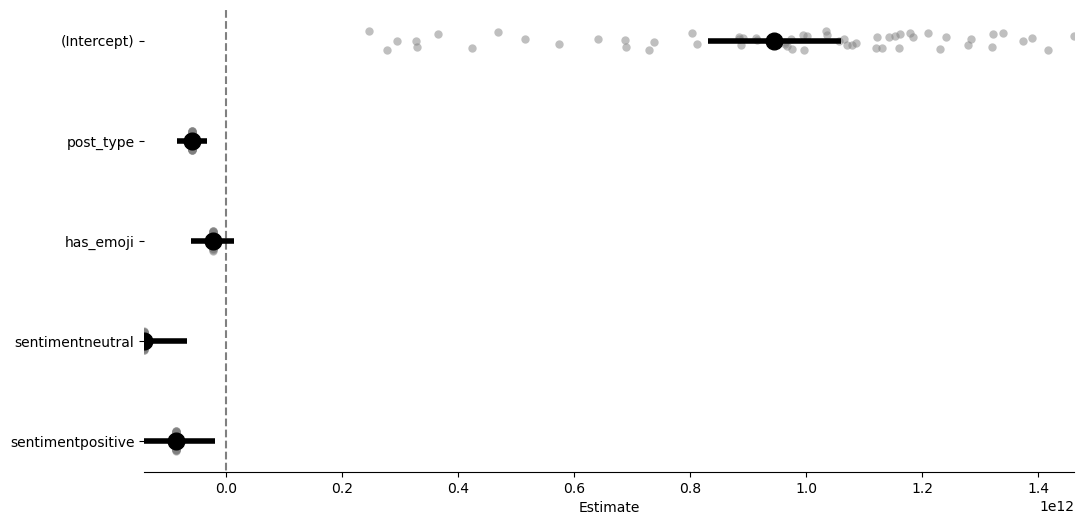

In [81]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

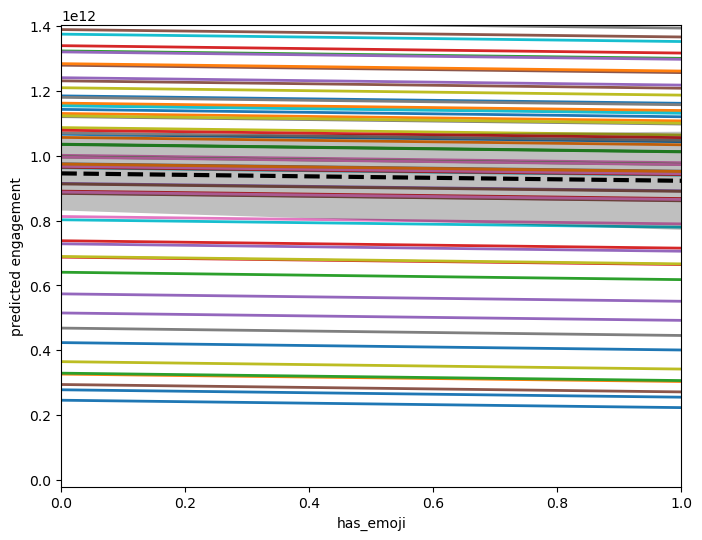

In [82]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

<Axes: xlabel='post_type', ylabel='predicted engagement'>

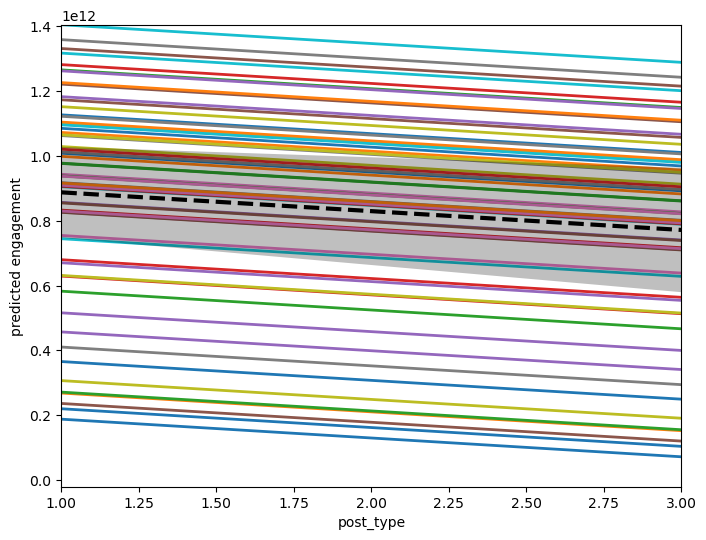

In [83]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

KeyError: 'sentiment'

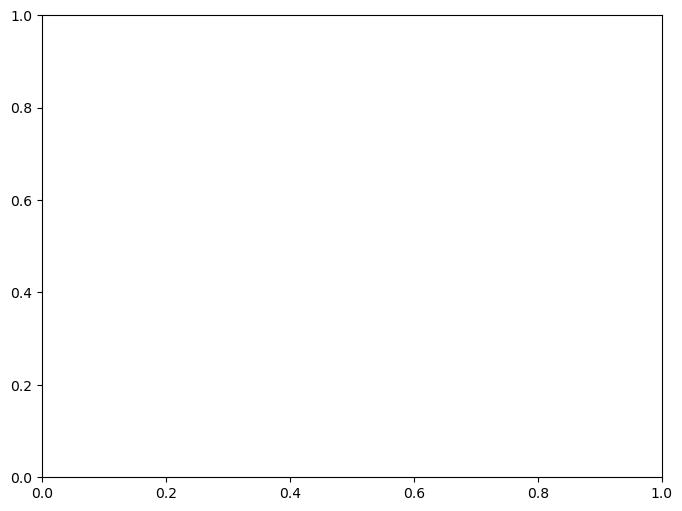

In [84]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
